In [28]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("훈련 세트 점수 : {:.3f}".format(logreg.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f} ".format(logreg.score(X_test,y_test)))

훈련 세트 점수 : 0.946
테스트 세트 점수: 0.965 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
logreg100 = LogisticRegression(C=100).fit(X_train,y_train)
print("훈련 세트 점수: {:.3f}".format(logreg100.score(X_train,y_train)))
print("테스트 세트 점수:{:.3f}".format(logreg100.score(X_test,y_test)))

훈련 세트 점수: 0.955
테스트 세트 점수:0.951


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
logreg001 = LogisticRegression(C=0.01).fit(X_train,y_train)
print("훈련 세트 점수: {:.3f}".format(logreg001.score(X_train,y_train)))
print("테스트 세트 점수:{:.3f}".format(logreg001.score(X_test,y_test)))

훈련 세트 점수: 0.934
테스트 세트 점수:0.930


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


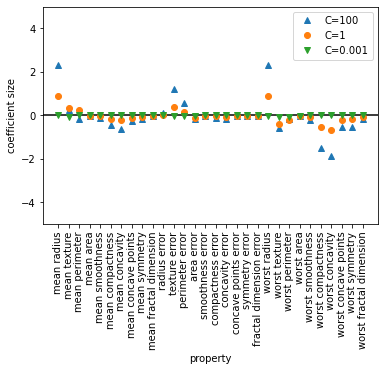

In [25]:
plt.plot(logreg100.coef_.T,'^', label = "C=100")
plt.plot(logreg.coef_.T,'o', label = "C=1")
plt.plot(logreg001.coef_.T,'v', label = "C=0.001")
plt.xticks(range(cancer.data.shape[1]),cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0,xlims[0],xlims[1])
plt.xlim(xlims)
plt.ylim(-5,5)
plt.xlabel("property")
plt.ylabel("coefficient size")
plt.legend()

C=0.001 인 l1 로지스틱 회귀의 훈련 정확도:0.91
C=0.001 인 l1 로지스틱 회귀의 테스트 정확도:0.91
C=1.000 인 l1 로지스틱 회귀의 훈련 정확도:0.96
C=1.000 인 l1 로지스틱 회귀의 테스트 정확도:0.96
C=100.000 인 l1 로지스틱 회귀의 훈련 정확도:0.99
C=100.000 인 l1 로지스틱 회귀의 테스트 정확도:0.99


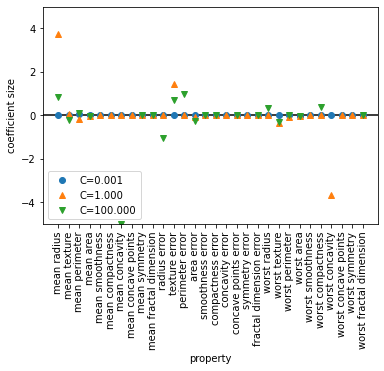

In [19]:
for C,marker in zip([0.001,1,100],['o','^','v']):
    lr_l1=LogisticRegression(solver='liblinear',C=C,penalty="l1").fit(X_train, y_train)
    print("C={:.3f} 인 l1 로지스틱 회귀의 훈련 정확도:{:.2f}".format(C, lr_l1.score(X_train,y_train)))
    print("C={:.3f} 인 l1 로지스틱 회귀의 테스트 정확도:{:.2f}".format(C, lr_l1.score(X_train,y_train)))
    plt.plot(lr_l1.coef_.T,marker,label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]),cancer.feature_names,rotation=90)
xlims = plt.xlim()
plt.hlines(0,xlims[0],xlims[1])
plt.xlim(xlims)
plt.xlabel("property")
plt.ylabel("coefficient size")

plt.ylim(-5,5)
plt.legend(loc=3)